<a href="https://colab.research.google.com/github/kiyong21c/Must_Have_pytorch_DL/blob/main/20220929_bayesianOptimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 베이지안 최적화(bayesian optimization)
 - 하이퍼파라미터 값을 확률적으로 추정하며 탐색하는 기법
 - 그리드서치나 랜덤서치보다 빠르고 효율적
 - bayes_opt 패키지 사용

  > 1.하이퍼파라미터 탐색범위 설정

  > 2.평가지표 계산 함수(성능 평가 함수) 정의

  > 3.BayesianOptimization 객체 생성 : '평가지표 계산 함수'와 '하이퍼파라미터 탐색범위'를 입력받음

  > 4.베이지안 최적화 수행 : BayesianOptimization객체의 maximize()메서드 호출

  > 평가지표 값이 가장 좋았을 떄의 하이퍼파라미터 값을 최적 하이퍼파라미터로 간주

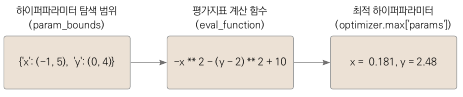

In [1]:
# 1. 하이퍼파라미터 탐색 범위 설정

param_bounds = {'x':(-1, 5), 'y':(0, 4)}
# 딕셔너리형태로 정의
# 키에 하이퍼파라미터 이름을, 값에 하이퍼라이미터 범위(튜플형태) 지정
# (-1, 5) : -1 ~ 5사이 탐색

In [2]:
# 2. 평가지표 계산함수 정의

def eval_function(x, y):
    return -x ** 2 - (y -2) ** 2 + 10

In [6]:
# 3. 베이지안 최적화 객체 생성
# !pip install bayesian-optimization
from bayes_opt import BayesianOptimization

optimizer = BayesianOptimization(f=eval_function,
                                 pbounds=param_bounds,
                                 random_state=0)
# 파라미터 f : 최대화하려는 평가지표 계산 함수'명' 전달
# 파라미터 pbounds : 하이퍼파라미터 범위

In [7]:
# 4. 최적화 수행

optimizer.maximize(init_points=2, n_iter=10)
# init_points : 랜던 탐색을 수행할 스텝 횟수(탐색 공간을 다양화함)
# n_iter : 베이지안 최적화를 수행할 스텝 횟수

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        |  4.002    |  2.293    |  2.861    |
|  2        |  3.121    |  2.617    |  2.18     |
|  3        |  3.832    |  2.327    |  2.869    |
|  4        |  4.596    |  2.171    |  2.832    |
|  5        | -6.227    |  3.989    |  2.559    |
|  6        |  9.467    |  0.3522   |  1.361    |
|  7        |  7.39     | -1.0      |  3.269    |
|  8        |  5.0      | -1.0      |  0.0      |
|  9        |  3.841    |  1.469    |  0.0      |
|  10       |  8.966    | -1.0      |  1.817    |
|  11       |  9.737    |  0.1806   |  2.48     |
|  12       |  5.785    |  0.4638   |  4.0      |


 - 기존평가점수 최댓값 갱신시 빨간색 표시
 - 빨간색 표시 중 마지막 빨간색 표시값이 전체에서 최대
 - 최적의 하이퍼파라미터 : x=0.181, y=2.48

In [8]:
# 5. 최적의 하이퍼파라미터 확인
optimizer.max

{'target': 9.737086714115259,
 'params': {'x': 0.18063750530344547, 'y': 2.479878502917653}}